<img src="./resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2023, Day 3 </h1> 
<h3 align="center"> August 22, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> The Questions </h2>
    
<p> The first week of the course is devoted to question focused workshops and addresing those questions with datasets and computational methods that we will present.  Each day will be devoted to its own question.  
    
<p> For reference, the questions (as they are currently formulated) are
<ul>
<li> Day 1:  How do single neurons encode information about the external world?  
<li> Day 2:  How do populations of neurons encode information about the external world? 
<b><li> Day 3:  How do cell type and circuit architecture contribute to physiological function?</b>
<li> Day 4:  What is a behavioral state and how can we define it? 
<li> Day 5:  How does network structure lead to network dynamics?
</ul>

<h1> Using structural features of Neurons for clustering into cell types </h1>

Structural differences, show which structural features were used in Casey's paper. Add link to paper: 
<li> Further reading: https://www.biorxiv.org/content/10.1101/2023.01.23.525290v2
<li> We will use a set of pre-extracted features of excitatory cells to run clustering methods. We will visualize how well the clustering methods work. 

<img src="./resources/neuron_structures.jpg">  
<img src="./resources/F3.large.jpg"> 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Machine learning has many canonical problem types that we will discuss in these tutorials. These include Regression, Classification, Clustering, and Dimension Reduction. This tutorial is focused on Clustering.

<p>K-means clustering is an example of a unsupervised learning problem. It is automatic grouping of similiar objects into sets without using labels. In a clustering problem, we are given $N$ data points $\vec{x}_i$ where $i \in [1,N]$, where each data point is a d-dimensional real vextor. We want to partition the $N$ data points into $K (\leq N)$ sets $S = {S_1, S_2, ..., S_K}$ as to minizie the within-cluster sum of squares (i.e. variance). The objective is to find:
    
$\operatorname*{argmin}_S \sum_{i=1}^{K}\sum_{\vec{x} \in S_i} \| \vec{x} - \mu_i \|^2 = \operatorname*{argmin}_S \sum_{i=1}^{K} |S_i| Var S_i$
    
where $\mu_i$ is the mean (also called centroid) of the points in $S_i$, i.e.
    
$\mu_i = \frac{1}{|S_i|}\sum_{\vec{x}\in S_i} \vec{x}$

where $|S_i|$ is the size of $S_i$, and $||.||$ is the $L^2$ norm. 
    
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.

The `scikit-learn` website:  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Source wiki website: https://en.wikipedia.org/wiki/K-means_clustering
</p>
    
</div>

<img src="./resources/K-means example.png">

##### 1. k initial "means" (in this case k=3) are randomly generated within the data domain (shown in color).

##### 2. k clusters are created by associating every observation with the nearest mean. The partitions here represent the Voronoi diagram generated by the means.

##### 3. The centroid of each of the k clusters becomes the new mean.

##### 4. Steps 2 and 3 are repeated until convergence has been reached.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> Please keep dependencies to the absolute minimum!  
    
<p> This is both to make it less likely we encounter problems and to minimize the firehose problem for students who are newer to Python.  You might want to use some fancy visualization package or something else, but that's one more thing in the brain of a complete beginner.
    
<p> If you *must* introduce a dependency that is not covered elsewhere, you need to describe it to students so that they know what it is.  We will need to coordinate this across dataset presentations so that we can distribute introductions to useful aspects of Python not covered in the Bootcamp across the days.  Remember that this is a secondary function of these notebooks, though, so don't get bogged down introducing cool Python tricks and tools.
    
</div>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

##### let's start Let's start by actually implementing this algorithm on some toy data. You may notice how clustering is formed

In [37]:
# create 2-D toy data
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [38]:
# print shape of X
X.shape

(6, 2)

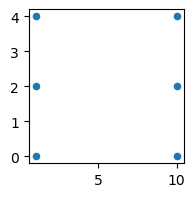

In [39]:
# Visualize X
plt.figure(figsize=(2,2))
plt.scatter(X[:,0],X[:,1], s = 20)

##### using scikit-learn built in k-means clustering function

In [40]:
# Determines number of clusters K
K = 2

In [41]:
# Determines random number generation for centroid initialization
random_state = 0

In [42]:
# Determines method for initilization ('k-means++', 'random')
# ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability
# distribution of the points’ contribution to the overall inertia. 
# ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.
init = 'k-means++'

In [43]:
# run k-means clustering
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init).fit(X)

In [44]:
# print cluster labels for each data points

print(kmeans.labels_)

[1 1 1 0 0 0]


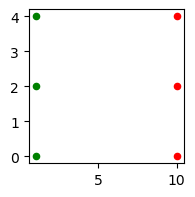

In [45]:
# visualize the clustering results
plt.figure(figsize=(2,2))
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='green')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='red')

In [46]:
# now play with number of clusters K
K = 3

In [47]:
# run k-means clustering
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init).fit(X)

In [48]:
# print cluster labels for each data points
print(kmeans.labels_)

[1 1 1 0 0 2]


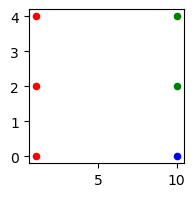

In [49]:
# visualize the clustering results
plt.figure(figsize=(2,2))
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.1:</b>  How about larger K?
</div>

In [50]:
K = 4

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.2:</b>  How about different random initializations?
</div>

In [21]:
random_state = ?
init = ?
n_init = ?

SyntaxError: invalid syntax (3002425415.py, line 1)

##### Now let's try some larger scale 2D dataset. 

In [51]:
# Set the random seed for reproducibility
np.random.seed(0)

# Number of points
n_points = 100

# data point dimension
D_dim = 2

# Generate random 2D points
X = np.random.rand(n_points, D_dim)

In [52]:
# print shape of X
X.shape

(100, 2)

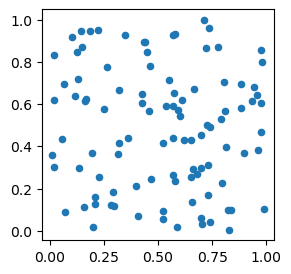

In [53]:
# Visualize X
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1], s = 20)

In [54]:
# run k-means clustering when number of clusters K = 3
K = 3 
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init).fit(X)

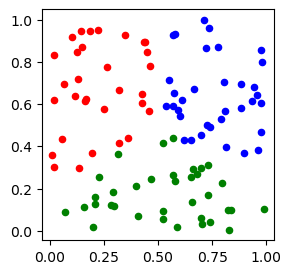

In [55]:
# visualize the clustering results
plt.figure(figsize=(3,3))
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.3:</b>  run k-means clustering when number of clusters K = 5?
</div>

In [56]:
# run k-means clustering when number of clusters K = 5
K = 5
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init).fit(X)

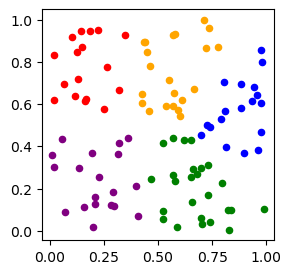

In [57]:
# visualize the clustering results
plt.figure(figsize=(3,3))
plt.scatter(X[kmeans.labels_==4,0], X[kmeans.labels_==4,1], s = 20, c ='orange')
plt.scatter(X[kmeans.labels_==3,0], X[kmeans.labels_==3,1], s = 20, c ='purple')
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Question 1.1:</b>  Which K is better? How to evaluate the clustering results?
</div>

##### Now let's try some larger scale dataset with feature dim is larger than 2 - ie the real structural dataset


In [58]:
# Relevant imports

import skel_features
import pandas as pd
import numpy as np
from scipy import stats
#import umap

# dir handling
import os

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# We will import other sklearn packages as needed

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p> For demonstration purposes, we import features from a larger list of excitatory cells:

In [59]:
# read features from existing csv files
feat_df = pd.read_csv('./data/excitatory_properties.csv')

# What features does the dataframe consist of? 

In [60]:
feat_df.columns

Index(['Unnamed: 0', 'pt_root_id', 'soma_depth', 'tip_len_dist_dendrite_p50',
       'tip_tort_dendrite_p50', 'num_syn_dendrite', 'num_syn_soma',
       'path_length_dendrite', 'radial_extent_dendrite',
       'syn_dist_distribution_dendrite_p50', 'syn_size_distribution_soma_p50',
       'syn_size_distribution_dendrite_p50',
       'syn_size_distribution_dendrite_dyn_range', 'syn_depth_dist_p5',
       'syn_depth_dist_p95', 'syn_depth_extent', 'max_density', 'radius_dist',
       'syn_count_pca0', 'syn_count_pca1', 'syn_count_pca2', 'syn_count_pca3',
       'syn_count_pca4', 'syn_count_pca5', 'branch_svd0', 'branch_svd1',
       'branch_svd2', 'ego_count_pca0', 'ego_count_pca1', 'ego_count_pca2',
       'ego_count_pca3', 'ego_count_pca4', 'classification_system',
       'cell_type_manual', 'has_ct_axon', 'umap0', 'umap1', 'm_type',
       'cell_id'],
      dtype='object')

### This dataset has many more dimensions! Let us try visualizing it using some dimensionality reduction techniques

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Visualization </h2>
<p> Let us visualize the feature space along with the manually classified cell types. 
<p> We will first try PCA (Principal Component Analysis) : https://en.wikipedia.org/wiki/Principal_component_analysis to reduce dimensionality of our data
<p> Another alternative is UMAP: https://umap-learn.readthedocs.io/en/latest/ for dimensionality reduction and visualization

In [62]:
# test k-means for cell-type categorization - visualize on reduced data
from sklearn.decomposition import PCA
#reduced_data = feat_df[["umap0", "umap1"]].copy().to_numpy()
# PCA-reduced data
# remove irrelevant fields, comment this later for students to do themselves

reduced_for_kmeans = feat_df.copy()

## Which features from feat_df should we retain? Which ones should we remove? 

### comment this later ###
reduced_for_kmeans.drop(['Unnamed: 0','pt_root_id','classification_system',
       'cell_type_manual', 'has_ct_axon', 'umap0', 'umap1', 'm_type',
       'cell_id'], axis=1, inplace=True)

#####


reduced_data = PCA(n_components=2).fit_transform(reduced_for_kmeans)

# how many clusters? 
n_celltypes = 10
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

In [64]:
reduced_data.shape

(1183, 2)

In [67]:
# We will append this to the original dataframe as the PC0, PC1 components
feat_df['pc0'] = reduced_data[:,0]
feat_df['pc1'] = reduced_data[:,1]

# PCA/UMAP visualization superimposed with manual cell types

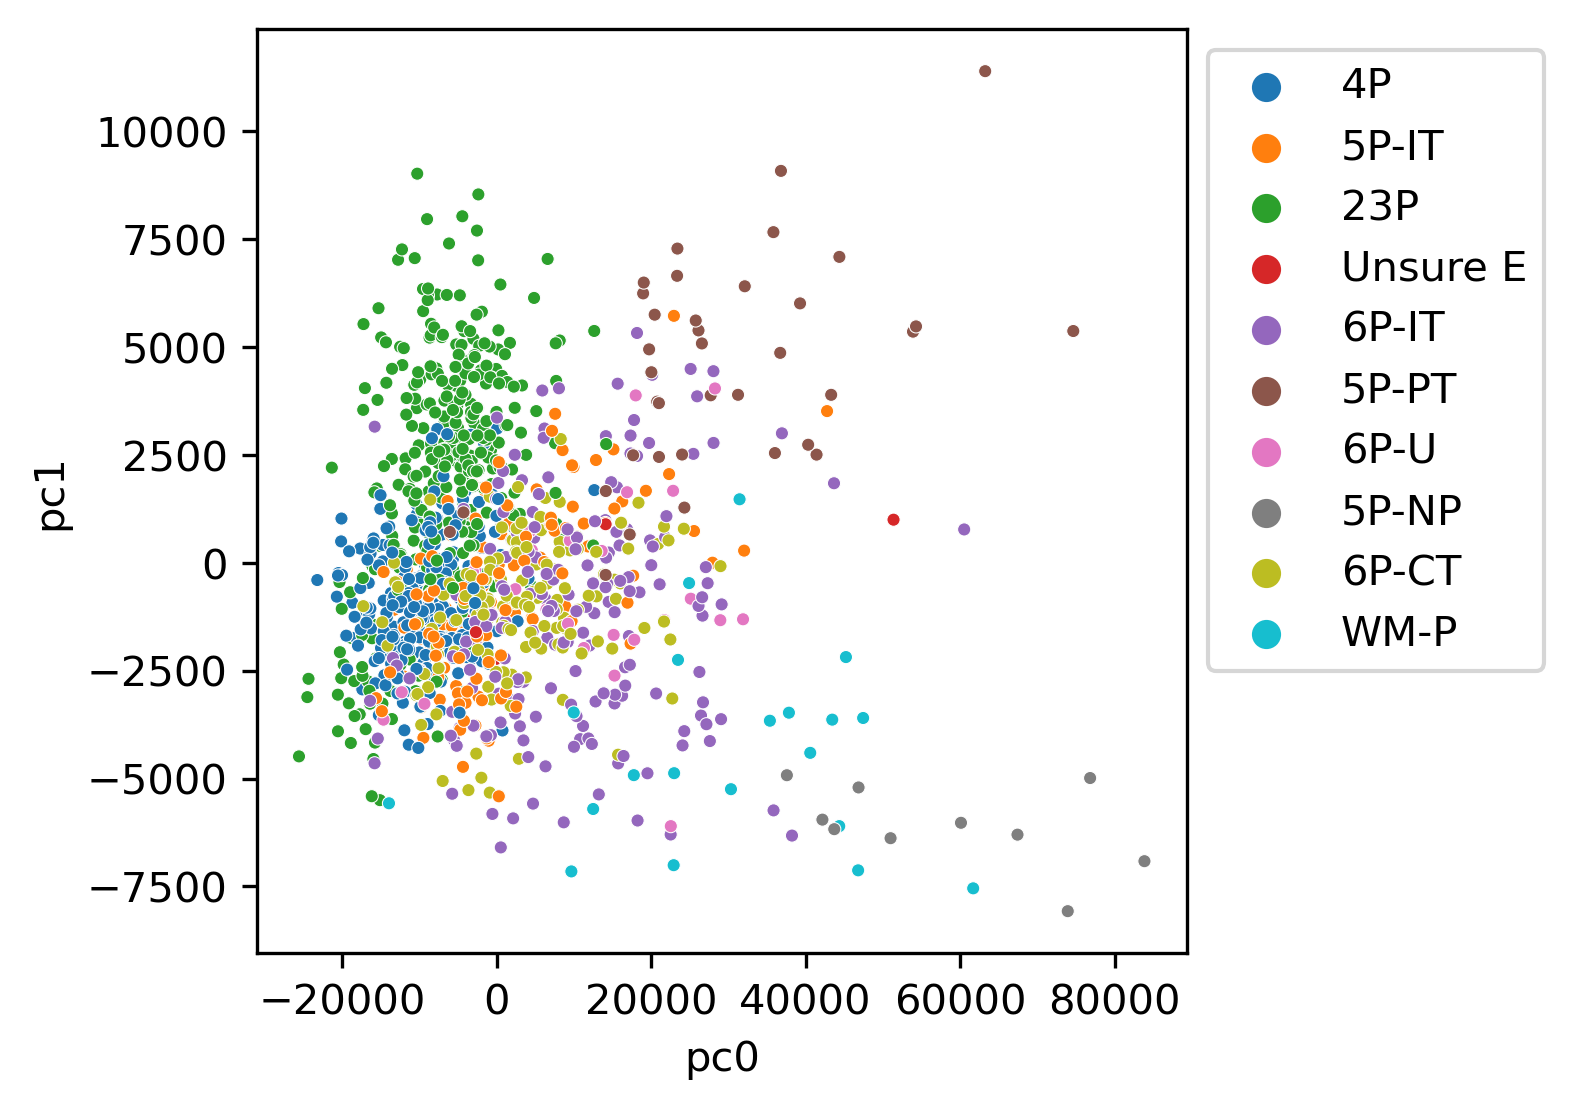

In [69]:
# PCA
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="pc0",
    y="pc1",
    data=feat_df,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="pc0",
    y="pc1",
    data=feat_df.query('cell_type_manual != "Unsure I"'),
    s=10,
    hue="cell_type_manual",
    
)

ax.legend().set_bbox_to_anchor((1,1))

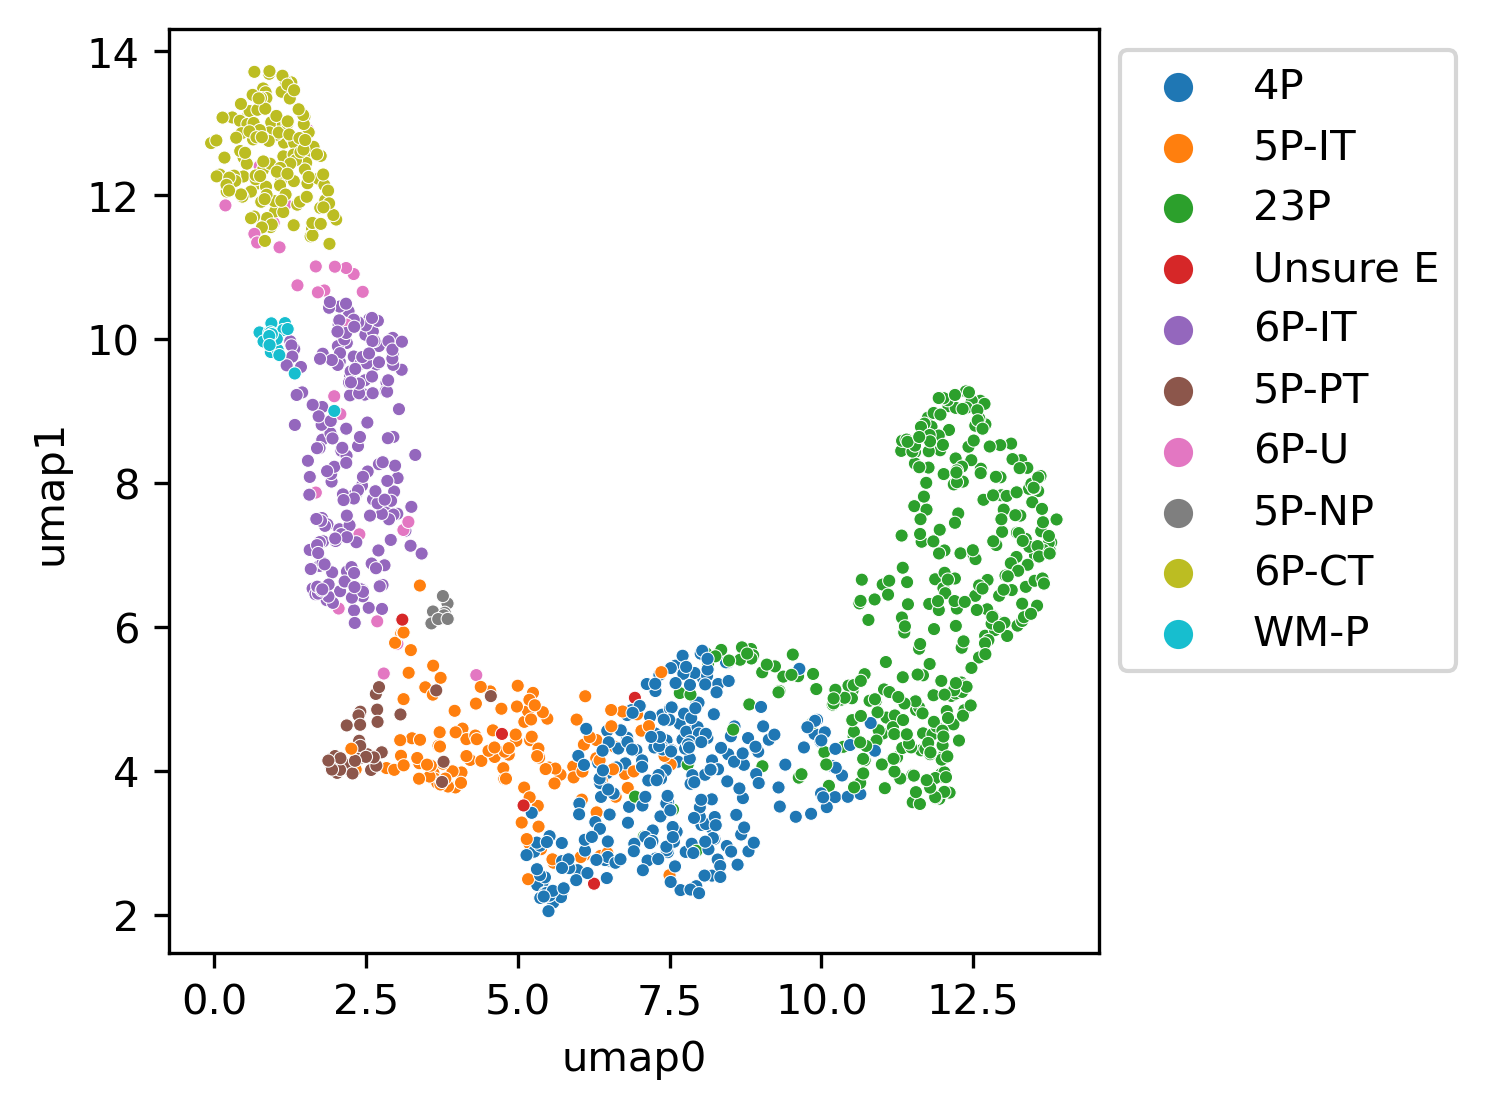

In [13]:
### UMAP BELOW
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="umap0",
    y="umap1",
    data=feat_df,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="umap0",
    y="umap1",
    data=feat_df.query('cell_type_manual != "Unsure I"'),
    s=10,
    hue="cell_type_manual",
    
)

ax.legend().set_bbox_to_anchor((1,1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Question:  </h2>
<p> Can we use K-means clustering to divide our feature-space to cell type clusters? 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> We will first use a reduced dataset (with lower dimensionality) obtained from PCA, then apply K-means clustering

In [70]:
# test k-means for cell-type categorization - visualize on reduced data
from sklearn.cluster import KMeans
reduced_data = feat_df[["umap0", "umap1"]].copy().to_numpy()
# also try pca-reduced data?


# how many clusters? 
n_celltypes = 10
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].


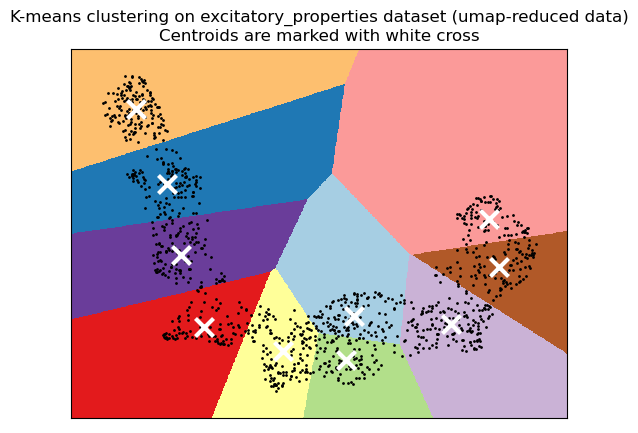

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on excitatory_properties dataset (umap-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
# plot above - overlay the crosses with the old UMAP plot, and show the places of clusters....
# Quantitative score - adjusted RAND index/ score - to compare this with the previously plotted UMAP
#https://en.wikipedia.org/wiki/Rand_index
# kmeans kind of works with broader clusters, play with feature dim for interleaved-classes in 2D? 
# Move some analysis to problem set notebook

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Question: Why does K-means not work very well here?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> We will now try K-means clustering on the original dataset

In [24]:
# fit k-means on all features
reduced_for_kmeans = feat_df.copy()

## Which features from feat_df should we retain? Which ones should we remove? 

### comment this later ###
reduced_for_kmeans.drop(['Unnamed: 0','pt_root_id','classification_system',
       'cell_type_manual', 'has_ct_axon', 'umap0', 'umap1', 'm_type',
       'cell_id'], axis=1, inplace=True)

#####

# how many clusters? 
n_celltypes = 10
kmeans = KMeans(init="k-means++", n_clusters=n_celltypes, n_init=4)
kmeans_predict = kmeans.fit(reduced_for_kmeans)


In [26]:
kmeans_predict

KMeans(n_clusters=10, n_init=4)

In [29]:
reduced_data.shape

(1183, 2)

In [30]:
kmeans.labels_.shape

(1183,)

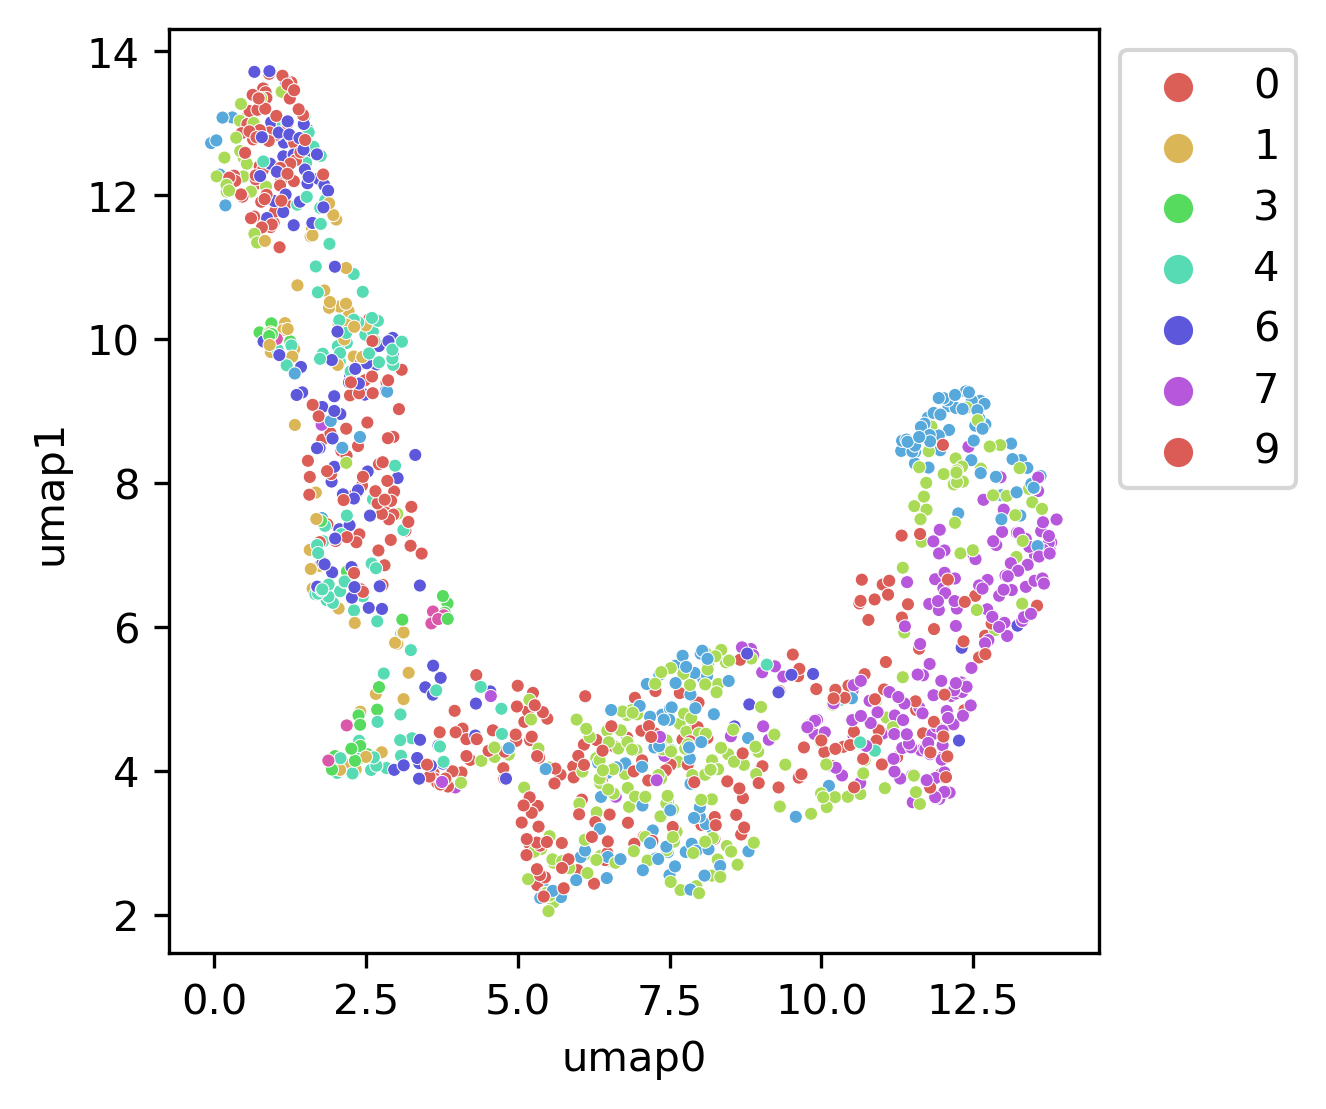

In [32]:
# Visualize these clusters - on umap data as we did for manual cell types
# reduced dataset:
reduced_data = feat_df[["umap0", "umap1"]].copy()
reduced_data['labels'] = kmeans.labels_

# Now visualize clustering results with dimenison reduced version
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
sns.scatterplot(
    x="umap0",
    y="umap1",
    data=reduced_data,
    s=2,
    alpha=0.2,
    color='k',
)

sns.scatterplot(
    x="umap0",
    y="umap1",
    data=reduced_data,
    s=10,
    hue="labels", palette="hls"
    
)

ax.legend().set_bbox_to_anchor((1,1))

#plt.figure(figsize=(3,3))
#plt.scatter(X_reduce[kmeans.labels_==2,0], X_reduce[kmeans.labels_==2,1], s = 20, c ='blue')
#plt.scatter(X_reduce[kmeans.labels_==1,0], X_reduce[kmeans.labels_==1,1], s = 20, c ='red')
#plt.scatter(X_reduce[kmeans.labels_==0,0], X_reduce[kmeans.labels_==0,1], s = 20, c ='green')

### stopped here ###

In [26]:
import phenograph

from sklearn import ensemble, model_selection

In [27]:
from xgboost import XGBClassifier
from bidict import bidict

bst = XGBClassifier(n_estimators=10, max_depth=7, learning_rate=1, objective='binary:logistic')

In [28]:
model_selection.cross_validate(
    bst,
    feat_df.dropna(subset='cell_type')[feat_cols_nospace],
    feat_df.dropna(subset='cell_type')['is_exc'],
    cv=5,
)

KeyError: ['cell_type']